THIS NOTEBOOK IS JUST FOR DATA EXPLORATION PURPOSES
1) TO FIND IF WOMEN PARTICIPATION HAS SIGNIFICANTLY INCREASED WITH TIME, 
2) TO ANALYSE THE PERFORMANCE OF COUNTRIES,
3) TO FIND OUT THE BEST ATHELETE BASED ON MEDALS ACHIEVED

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
events=pd.read_csv("/home/jovyan/athlete_events.csv")
events.info()
## we do find variables like Age, Height, Weight have missing values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [3]:
# lets read the other dataset available
regions=pd.read_csv("/home/jovyan/noc_regions.csv")
regions.info()
#presence of missing values is observed in variable Region

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


In [4]:
# merging both the dataset
olympics = pd.merge(events, regions, on="NOC", how="left")
olympics.shape

(271116, 17)

In [5]:
olympics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  region  270746 non-null  object 
 16  notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


Filtering to only contain rows that correspond to Summer Olympics and also excluding year 1906 Intercaleted Games from the data. IN this game medals were distributed but are no longer recognized by the International Olympic Committee.

In [6]:
Summer_olympics=olympics[(olympics.Season=='Summer') & (olympics.Year!=1906)]

In [7]:
Summer_olympics.shape

(220819, 17)

In [8]:
# Descriptive Statistics
Summer_olympics.describe()
Summer_olympics.iloc[:,1:].describe()

,Age,Height,Weight,Year
count,212373.000000,170438.000000,168493.000000,220819.000000
mean,25.667288,175.511494,70.682699,1976.868947
std,6.692954,10.918801,14.805977,30.427978
min,10.000000,127.000000,25.000000,1896.000000
25%,21.000000,168.000000,60.000000,1960.000000
50%,24.000000,175.000000,70.000000,1984.000000
75%,28.000000,183.000000,79.000000,2000.000000
max,97.000000,226.000000,214.000000,2016.000000


Lets Split the data right away before any exploration is done

In [9]:
## Data Split into Train and Test
data_test = Summer_olympics[Summer_olympics.Year==2016]
data_train = Summer_olympics[Summer_olympics.Year<2016]

#dropping columns Id,Games and notes
data_train = data_train.drop(data_train.columns[[0,8, 16]], axis=1)
data_test = data_test.drop(data_test.columns[[0,8, 16]], axis=1)


In [10]:
## filling the NaN values of column 'Region' by taking the values from 'Team' 
data_train["region"].fillna(data_train["Team"], inplace=True)
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207131 entries, 0 to 271109
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Name    207131 non-null  object 
 1   Sex     207131 non-null  object 
 2   Age     198685 non-null  float64
 3   Height  156926 non-null  float64
 4   Weight  155028 non-null  float64
 5   Team    207131 non-null  object 
 6   NOC     207131 non-null  object 
 7   Year    207131 non-null  int64  
 8   Season  207131 non-null  object 
 9   City    207131 non-null  object 
 10  Sport   207131 non-null  object 
 11  Event   207131 non-null  object 
 12  Medal   31607 non-null   object 
 13  region  207131 non-null  object 
dtypes: float64(3), int64(1), object(10)
memory usage: 23.7+ MB


In [11]:
## lets identify if there is any outlier before imputing the missing values for Age,Height and Weight.
## Identifying the outliers with skewness if any
print(data_train[['Age','Height','Weight']].skew())
data_train[['Age','Height','Weight']].describe()

Age       1.800660
Height    0.009947
Weight    0.831643
dtype: float64


,Age,Height,Weight
count,198685.000000,156926.000000,155028.000000
mean,25.630043,175.466481,70.656127
std,6.762423,10.871594,14.724121
min,10.000000,127.000000,25.000000
25%,21.000000,168.000000,60.000000
50%,24.000000,175.000000,70.000000
75%,28.000000,183.000000,79.000000
max,97.000000,226.000000,214.000000


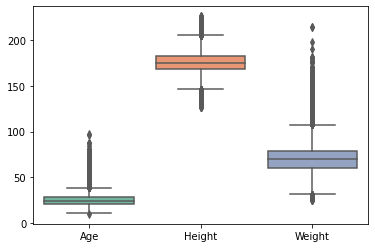

In [12]:
#identifying the outlier using Box Plot.
import seaborn as sns
ax = sns.boxplot(data=data_train.iloc[:,1:6],orient="v", palette="Set2")
#It can be observed in the box plot of Height that there are outliers. But they can be genuine outliers as the height of the basketball players can be extraordinarily high whereas the height of gymnasts can be very low.
#It can be observed in the box plot of weight that there are outliers. But they can be genuine outliers as the weight of the weightlifters can be extraordinarily high whereas the weight of gymnasts can be very low.
#Hence, even if the outliers are detected, they cannot be replaced with mean or deleted as it might then defeat the whole purpose of using data of Olympians. 

Imputing the missing values for Age,height and Weight using Median as the data is highly skewed. cite??

In [13]:
#imputing the missing values for continuous variables
#looking at the box plot, we understnad that the variables are skewed, so will be using median to impute the missing values.
import numpy as np
imp_col = ['Age','Height','Weight']
for col in imp_col:
    data_train[col] = data_train[col].fillna((data_train[col].median()))

In [14]:
print(data_train.isnull().sum())

Name           0
Sex            0
Age            0
Height         0
Weight         0
Team           0
NOC            0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     175524
region         0
dtype: int64


EXPLORATORY ANALYSIS BEGINS

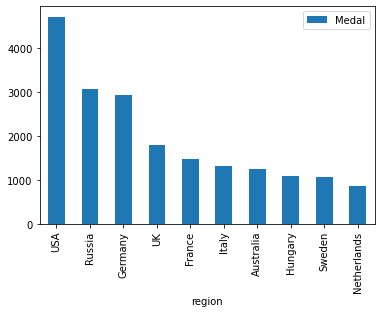

In [15]:
##which country is at Top in medal Counts
medal_count=data_train.groupby('region').count()
df = pd.DataFrame(medal_count, columns=['Medal']) 
Sort = df.sort_values(['Medal'], ascending=False)
top_count10 =Sort.head(10)
top_count10.plot(kind='bar')

#Result = US is at top

OBSERVATION: US HOLDS THE MOST NO OF MEDALS FOLLOWED BY RUSSIA AND THEN GERMANY SINCE THE BEGINNING

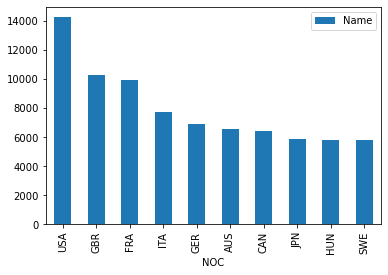

In [16]:
## participation by country
participants_count=data_train.groupby('NOC').count()
df1 = pd.DataFrame(participants_count, columns=['Name']) 
Sort_p = df1.sort_values(['Name'], ascending=False)
top_count =Sort_p.head(10)
top_count
top_count.plot(kind='bar')


OBSERVATION: more participation = more medal win. USA has maximum participation with max no of medal wins.

In [17]:
#top 10 players with Most number of Medals throughout
medal = data_train.groupby(['Year','Name','Medal']).size().unstack('Medal',fill_value=0)
medal['Total'] = medal['Gold'] +medal['Silver'] +medal['Bronze'] 
medal.reset_index(inplace=True)
topplayers=[group.sort_values('Total',ascending=False)[:1] for year,group in medal.groupby('Year')]
topplayers
top=pd.DataFrame()
for i in topplayers:
    top = top.append(i)
top


Medal,Year,Name,Bronze,Gold,Silver,Total
44,1896,Hermann Otto Ludwig Weingrtner,1,3,2,6
523,1900,Walter Beardsley Tewksbury,1,2,2,5
705,1904,George Louis Eyser,1,3,2,6
1496,1908,Oscar Gomer Swahn,1,2,0,3
1723,1912,Gustaf Vilhelm Carlberg,0,3,2,5
3553,1920,"Willis Augustus Lee, Jr.",1,5,1,7
4250,1924,"Viljo Eino ""Ville"" Ritola (Koukkari-)",0,4,2,6
4328,1928,"Georg ""Georges"" Miez",0,3,1,4
5275,1932,Istvn Pelle,0,2,2,4
6098,1936,Konrad Frey,2,3,1,6


OBSERVATION: Michael Fred Phelps, II has been the most successful athlete since 2004.

NOW LETS SEE THE GROWTH OF FEMALE PARTICIPATION OVER THE YEARS

In [18]:
#female participation over the years
groupedGender = data_train.groupby('Year')['Sex'].value_counts()
groupedGender

Year  Sex
1896  M       380
1900  M      1903
      F        33
1904  M      1285
      F        16
1908  M      3054
      F        47
1912  M      3953
      F        87
1920  M      4158
      F       134
1924  M      4989
      F       244
1928  M      4588
      F       404
1932  M      2622
      F       347
1936  M      6038
      F       468
1948  M      5777
      F       628
1952  M      6773
      F      1497
1956  M      4234
      F       893
1960  M      6684
      F      1435
1964  M      6354
      F      1348
1968  M      6811
      F      1777
1972  M      8111
      F      2193
1976  M      6469
      F      2172
1980  M      5435
      F      1756
1984  M      7007
      F      2447
1988  M      8494
      F      3543
1992  M      8853
      F      4124
1996  M      8772
      F      5008
2000  M      8390
      F      5431
2004  M      7897
      F      5546
2008  M      7786
      F      5816
2012  M      7105
      F      5815
Name: Sex, dtype: int64

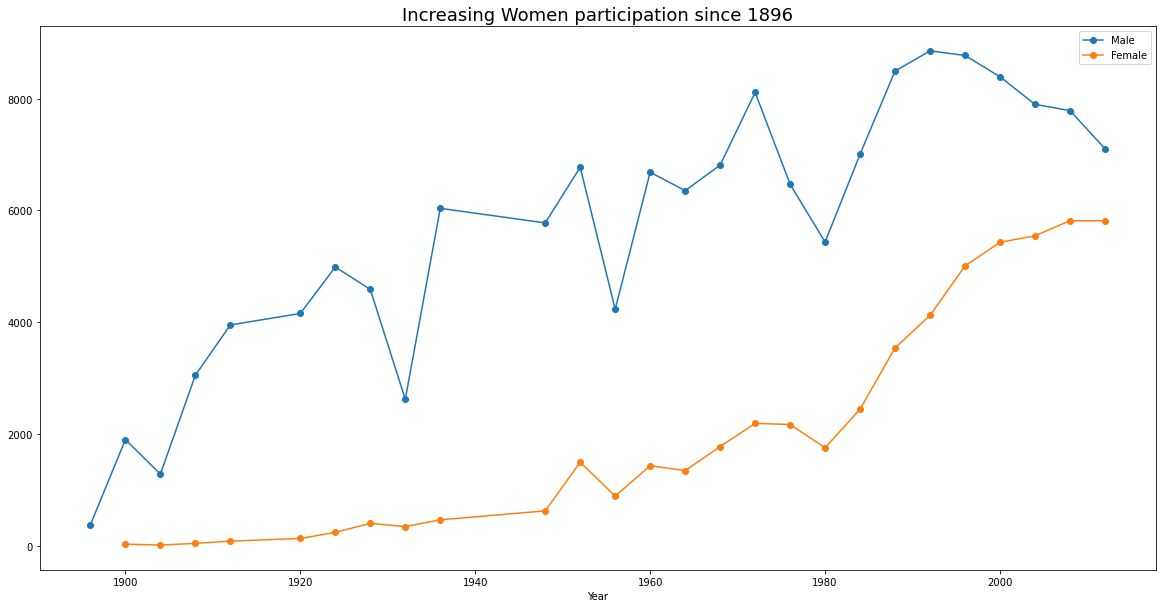

In [19]:
#Lets Plot it
groupedGender = data_train.groupby('Year')['Sex'].value_counts()
plt.subplots(figsize=(20, 10))
groupedGender.loc[:,'M'].plot(marker = 'o',label = 'Male')
groupedGender.loc[:,'F'].plot(marker = 'o',label = 'Female')
plt.ylabel='Gender Count'
plt.legend()
plt.title('Increasing Women participation since 1896', fontsize="18")
plt.show()

OBSERVATION: Female participations has been increasing gradually and closing the gap with men. It has increased from 0 participation in 1896 to 5815 in 2012 compared to 7105 male participation. 

In [20]:
#Women medal win over the years
WomenInOlympics= data_train[(data_train.Sex == 'F')]
medal_F = WomenInOlympics.groupby(['Year','Medal']).size().unstack('Medal',fill_value=0)
medal_F['Total'] = medal_F['Gold'] +medal_F['Silver'] +medal_F['Bronze']
medal_F.reset_index(inplace=True)
medal_F

Medal,Year,Bronze,Gold,Silver,Total
0,1900,5,4,4,13
1,1904,2,6,2,10
2,1908,5,6,5,16
3,1912,10,10,10,30
4,1920,14,15,15,44
5,1924,15,15,16,46
6,1928,33,32,32,97
7,1932,20,20,22,62
8,1936,30,29,29,88
9,1948,35,33,33,101


<Figure size 1440x720 with 0 Axes>

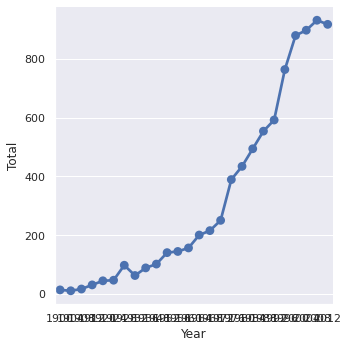

In [21]:
## lets plot it
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.catplot(x="Year",y="Total", data=medal_F, kind='point')

OBSERVATION: Women contribution to medal win has been increasing throughly.

In [22]:
#Number of women relative to men across countries

newdf = data_train[['NOC','Year','Name','Sex']]
newdf = newdf.drop_duplicates()

malefemale_count=newdf.groupby(['Year','NOC','Sex'])["Sex"].count().reset_index(name="counts")

Sort_F = malefemale_count.sort_values(['Year','Sex','counts'], ascending=(False,True,False))

Sort_M = malefemale_count.sort_values(['Year','Sex','counts'], ascending=(False,False,False))
print(Sort_F,Sort_M)

      Year  NOC Sex  counts
4433  2012  USA   F     268
4179  2012  GBR   F     257
4358  2012  RUS   F     226
4119  2012  CHN   F     208
4067  2012  AUS   F     184
...    ...  ...  ..     ...
2     1896  DEN   M       3
9     1896  SUI   M       3
0     1896  AUS   M       1
8     1896  ITA   M       1
10    1896  SWE   M       1

[4451 rows x 4 columns]       Year  NOC Sex  counts
4180  2012  GBR   M     273
4434  2012  USA   M     261
4068  2012  AUS   M     221
4188  2012  GER   M     212
4359  2012  RUS   M     203
...    ...  ...  ..     ...
2     1896  DEN   M       3
9     1896  SUI   M       3
0     1896  AUS   M       1
8     1896  ITA   M       1
10    1896  SWE   M       1

[4451 rows x 4 columns]


OBSERVATION: In 2012 U.S. team sent more women than men i.e 268 Female vs 261 Men

In [23]:
##Different Sports played
data_train["Sport"].value_counts()

Athletics                35646
Gymnastics               25690
Swimming                 21549
Shooting                 10573
Fencing                  10228
Cycling                  10054
Rowing                    9845
Wrestling                 6769
Football                  6227
Sailing                   6206
Equestrianism             5989
Boxing                    5764
Canoeing                  5730
Hockey                    5027
Basketball                4255
Weightlifting             3660
Water Polo                3588
Art Competitions          3578
Judo                      3412
Handball                  3312
Volleyball                3121
Diving                    2640
Tennis                    2528
Archery                   2134
Table Tennis              1719
Modern Pentathlon         1605
Badminton                 1280
Baseball                   894
Synchronized Swimming      791
Rhythmic Gymnastics        562
Taekwondo                  480
Softball                   478
Beach Vo

In [24]:
#Medal Distribution
data_train.Medal.value_counts()

Gold      10637
Bronze    10561
Silver    10409
Name: Medal, dtype: int64

Country with most Gold Medal

In [25]:
goldMedals = data_train[(data_train.Medal == 'Gold')]

In [26]:
goldMedals.region.value_counts().reset_index(name='Medal').head(10)

,index,Medal
0,USA,2321
1,Russia,1168
2,Germany,1012
3,UK,563
4,Italy,489
5,France,425
6,Hungary,415
7,Sweden,350
8,Australia,339
9,China,289


US has most of the Gold Medals with them.

WE COULD CONCLUDE THAT USA IS LEADING IN ALL THE AREAS
1)No. of Total Medals
2)Top Athelete
3)Maximum Women Participation